## Chapter 6. 차원축소

### 01. 차원 축소(Dimension Reduction) 개요

차원축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.

일반적으로 <b>피처 선택(feature selection)</b>과 **피처 추출(feature extraction)**로 나눌 수 있다.

**피처 선택**은 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것.<br>
**피처 추출**은 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것. 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른
공간으로 매핑해 추출하는것.


차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니다. 더 중요한 의미는 차원 축소를 통해 데이터를 잘 성명할 수 있는 잠재적인 요소를
추출하는 데에 있다. <br>
PCA, SVD, NMF는 이처럼 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘<br>
매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아 주는 데 이 알고리즘이 잘 활용되고 있습니다.

- 이미지 영역<br>
매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있음.<br>
이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행시 과적합 영향력이 작아져서 오히려
원본 데이터로 예측하는 것보다 예측 성능을 더 끌어 올릴 수 있음.

- 텍스트 영역<br>
문서 내 단어들의 구성에서 숨겨져 있는 시맨틱 의미나 토픽을 잠재 요소로 간주하고 이를 찾아낼 수 있음.<br>
SVD와 NMF는 이러한 시맨틱 토픽 모델링을 위한 기반 알고리즘으로 사용됨.

### 02. PCA(Pricipal Component Analysis)

#### PCA 개요

PCA(주성분 분석)는 가장 대표적인 차원 축소 기법.<br>
PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소 하는 기법.<br>
PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다.<br>
이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데 이것이 주성분이 된다.<br>
(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)

PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산(Covariance Matrix)을 고유값 분해하고,<br>
이렇게 구한 고유벡터에 입력 데이터를 선형변환하는 것.<br>
이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.<br>

**고유값(eigenvalue)**은 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.<br>
**고유벡터(eigenvector)**는 행렬A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭.<br>

선형변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미.<br>
분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미.

**입력데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA**

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df['target'] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


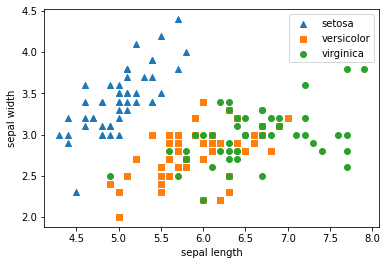

In [14]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    sepal_length = iris_df[iris_df['target']==i]['sepal_length']
    sepal_width = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(sepal_length, sepal_width, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다.<br> 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다.

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원의 붓꽃 데이터를 2차원의 PCA 데이터로 변환

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
pca_columns = ['pca_component_1', 'pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


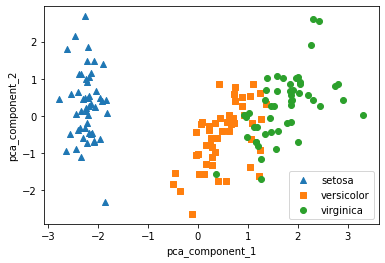

In [9]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    pca_x = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    pca_y = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(pca_x, pca_y, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA로 변환 후에도 pca_component_1 축을 기반으로 setosa 품종은 명확하게 구분이 가능.<br>
versicolor와 virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 구분이 잘 됨.<br>
이는 PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문.

In [11]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며, 두 번째인 pca_component_2가 약 22.8%를 차지.<br>
따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf_clf, iris.data, iris.target, scoring='accuracy', cv=3)
avg_score = np.mean(scores)
print('원본 데이터 평균 정확도 : {0:.3f}'.format(avg_score))

원본 데이터 평균 정확도 : 0.967


In [16]:
rf_clf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf_clf, iris_pca, iris.target, scoring='accuracy', cv=3)
avg_score = np.mean(scores)
print('PCA 변환 데이터 평균 정확도 : {0:.3f}'.format(avg_score))

PCA 변환 데이터 평균 정확도 : 0.887


예측 성능의 정확도가 원본 데이터 대비 8% 하락했는데, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도<br>
원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

### LDA(Linear Discriminant Analysis)

#### LDA 개요

LDA는 선형 판별 분석법으로 불리며, 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.<br>
LDA는 특정 공간상에서 클래스 분리를 최대하하는 축을 찾기 위해 클래스 간 분산(between-class scatter)
과 클래스 내 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소.<br>
즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식.<br>

클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점.

#### 붓꽃 데이터 세트에 LDA 적용하기

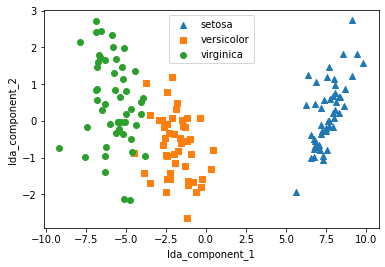

In [31]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
scaled_iris = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(scaled_iris, iris.target)
iris_lda = lda.transform(scaled_iris)

columns = ['lda_component_1', 'lda_component_2']
iris_df_lda = pd.DataFrame(iris_lda, columns=columns)
iris_df_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    lda_x = iris_df_lda[iris_df_lda['target']==i]['lda_component_1']
    lda_y = iris_df_lda[iris_df_lda['target']==i]['lda_component_2']
    plt.scatter(lda_x, lda_y, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 04. SVD(Singular Value Decomposition)

#### SVD 개요

PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.<br>
일반적으로 SVD는 m x n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미한다.

$$ A = U \sum V^T $$

SVD는 $A$의 차원이 m x n일 때 $U$의 차원이 m x m, $\sum$의 차원이 m x n, $V^T$의 차원이 n x n으로 분해합니다.

In [32]:
import numpy as np
from numpy.linalg import svd

np.random.seed(42)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[ 0.497 -0.138  0.648  1.523]
 [-0.234 -0.234  1.579  0.767]
 [-0.469  0.543 -0.463 -0.466]
 [ 0.242 -1.913 -1.725 -0.562]]


In [34]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix : \n', np.round(U, 3))
print('Sigma value : \n', np.round(Sigma, 3))
print('V transpose matrix \n: ', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.373 -0.598  0.642 -0.302]
 [-0.488 -0.35  -0.745 -0.289]
 [ 0.113  0.444  0.062 -0.887]
 [ 0.781 -0.568 -0.168 -0.197]]
Sigma value : 
 [3.08  1.926 0.92  0.342]
V transpose matrix 
:  [[ 0.021 -0.412 -0.783 -0.466]
 [-0.291  0.775 -0.086 -0.554]
 [ 0.461  0.479 -0.544  0.512]
 [ 0.838  0.017  0.289 -0.462]]


In [35]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(U, np.dot(Sigma_mat, Vt))
print(np.round(a_, 3))

[[ 0.497 -0.138  0.648  1.523]
 [-0.234 -0.234  1.579  0.767]
 [-0.469  0.543 -0.463 -0.466]
 [ 0.242 -1.913 -1.725 -0.562]]


Truncated SVD는 $\sum$의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로
분해하는 것.

이렇게 분해하면 인위적으로 더 작은 차원의 $U, \sum, V^T$로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없다.

#### 사이킷런 Truncated SVD 클래스를 이용한 변환

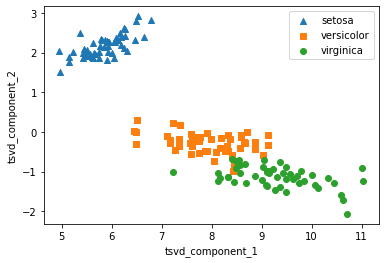

In [37]:
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris.data)
tsvd_iris = tsvd.transform(iris.data)
iris_tsvd_df = pd.DataFrame(tsvd_iris, columns = ['tsvd_component_1', 'tsvd_component_2'])
iris_tsvd_df['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    tsvd_x = iris_tsvd_df[iris_tsvd_df['target']==i]['tsvd_component_1']
    tsvd_y= iris_tsvd_df[iris_tsvd_df['target']==i]['tsvd_component_2']
    plt.scatter(tsvd_x, tsvd_y, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('tsvd_component_1')
plt.ylabel('tsvd_component_2')
plt.show()


Truncated SVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있다.

#### 05. NMF(Non-Negative Matrix Factorization)

#### NMF 개요

NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는게 보장되면,두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭.

ex) 4 x 6 원본 행렬 $V$는 4 x 2행렬 $W$와 2 x 6 행렬 $H$로 근사해 분해될 수 있다.<br>
이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다.<br>

NMF는 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있다.

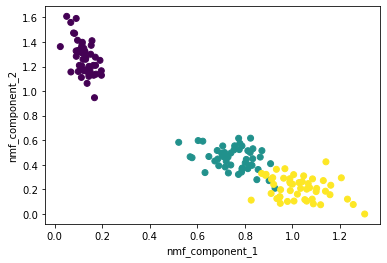

In [39]:
from sklearn.datasets import load_iris
from sklearn.decomposition import NMF

import matplotlib.pyplot as plt

iris = load_iris()

nmf = NMF(n_components=2)
nmf.fit(iris.data)
nmf_iris = nmf.transform(iris.data)

plt.scatter(nmf_iris[:, 0], nmf_iris[:, 1], c=iris.target)
plt.xlabel('nmf_component_1')
plt.ylabel('nmf_component_2')
plt.show()

### 06. 정리

많은 피처로 이뤄진 데이터 세트를 PCA같은 차원 축소를 통해 더욱 직관적으로 이해할 수 있다.<br>
차원 축소는 단순히 피처의 개수를 줄이는 개념보다는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있다.